This project analyzes 911 call data from Montgomery County, Pennsylvania, from 2016 until 2019, inclusive.


The list of possibilities for analysis with this dataset is limitless. I decided to choose pointers that I felt would allow for good data-driven business decisions.

* The columns of the main dataset are as follows:
  * 'lat': The lattitudinal coorindates of the call
  * 'lng': The longitudinal coordinates of the call
  * 'desc': the full address, date of call, and time of call, concatenated
  * 'zip': The zip code in which the call occured
  * 'title': Lists the primary call type (i.e. FIRE/EMS/TRAFFIC), followed by the SECONDARY call type (i.e. CARDIAC EMERGENCY)
  * 'timeStamp': The date/time when call was dispatched
  * 'twp': The township in which the call occured.
  * 'addr': The address of the incident
  * 'e': The count of incident. This is "1" for each incident
  * 'calltype': This is the primary call type category of the incident (EMS, FIRE, or TRAFFIC) 
  * 'year': The year in which the incident occured
  * 'month': The year in which the incident occured
  * 'day': The day in which the incident occured
  * 'hour': The hour in which the incident occured (0=12:00-12:59 AM, 23= 11:00-11:59 PM)
  * 'date': The date, in format YYYY-MM-DD
  * 'dayofweek' The day of the week (i.e. "Monday" or "Tuesday")
  * 'calltype2': The secondary call type category of the incident (i.e. "CARDIAC ARREST" or "FIRE ALARM")

# THE FOLLOWING WILL BE EXPLORED:
* Trend of Call Count Per Year From 2016-2019 (TOTAL, EMS, FIRE, TRAFFIC)    
* Most Prevalent Call Categories Overall (most relevant for EMS)
* Most Prevalent Call Categories in Particular Townships (most relevant for EMS)
* Average Daily Call Count By Month Over the Course of a Year (FIRE, EMS, TRAFFIC)
* The Average Number Of Daily Calls By Month Over The Course OF A Year (EMS, FIRE, TRAFFIC)
     * In other words, was a month consistently correlated with higher or lower daily call count?
         * An example might be: Did Traffic incidents increase in the winter months due to bad weather?
        
* Townships With Highest Call Volume (EMS, FIRE, TRAFFIC)
* Average Hourly Call Count Based on the Hour of the Day (All calls, EMS, FIRE, TRAFFIC)
* Average Hourly Call Count Based on the Day of the Week (All calls, EMS, FIRE, TRAFFIC)
* Correlation between Day or hour of week and Specific call type (most relevant for EMS)
    * For instance:
        * Were there were more FALL-related EMS calls during a particular hour of the week? (between 8-9 am on a Sunday?)
        * Were there more OVERDOSE-related calls on Saturdays?
        
        
 * Most prevalent secondary call types in each jurisdiction (most relevant for EMS) 



# PRELIMINARY STEPS:

#### Import necessary libraries and the relevant data set

In [228]:
#import necessary libraries and the relevant data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#"maincalls" will refer to the initial data frame, to which we will make some changes.
maincalls=pd.read_csv("data/911.csv")

In [379]:
array=maincalls.calltype2.unique()
array

<StringArray>
[              'ASSAULT VICTIM',                  'FALL VICTIM',
              'ABDOMINAL PAINS',        'ALTERED MENTAL STATUS',
           'DIABETIC EMERGENCY',                   'FIRE ALARM',
                 'VEHICLE FIRE',            'CARDIAC EMERGENCY',
          'UNCONSCIOUS SUBJECT',             'VEHICLE ACCIDENT',
        'RESPIRATORY EMERGENCY',             'DISABLED VEHICLE',
                  'HEAD INJURY',    'HAZARDOUS ROAD CONDITIONS',
                     'OVERDOSE',                    'DIZZINESS',
    'UNKNOWN MEDICAL EMERGENCY',                     'SEIZURES',
              'SUBJECT IN PAIN',         'UNRESPONSIVE SUBJECT',
             'GENERAL WEAKNESS',          'MEDICAL ALERT ALARM',
                        'FEVER',                  'LACERATIONS',
             'ROAD OBSTRUCTION',     'CARBON MONOXIDE DETECTOR',
           'FIRE INVESTIGATION',             'WOODS/FIELD FIRE',
                   'CVA/STROKE',            'BACK PAINS/INJURY',
           

#### Add some columns to our data frame

In [229]:
maincalls["calltype"]=maincalls["title"].str.split(":")
maincalls["title"]=maincalls["title"].astype("string")
maincalls["timeStamp"]=pd.to_datetime(maincalls["timeStamp"])
maincalls["year"]=maincalls["timeStamp"].dt.year
maincalls["month"]=maincalls["timeStamp"].dt.month
maincalls["day"]=maincalls["timeStamp"].dt.day
maincalls["hour"]=maincalls["timeStamp"].dt.hour
maincalls["title"]=maincalls["title"].astype("string")
maincalls["date"]=maincalls["timeStamp"].dt.date
maincalls['zip']=maincalls['zip'].astype(str).str.split('.', expand=True)[0]
maincalls["dayofweek"]=maincalls["timeStamp"].dt.day_name()


In [362]:
pd.set_option('display.max_colwidth', None)
maincalls.title

7916              EMS: ASSAULT VICTIM
7917                 EMS: FALL VICTIM
7918             EMS: ABDOMINAL PAINS
7919       EMS: ALTERED MENTAL STATUS
7920          EMS: DIABETIC EMERGENCY
                     ...             
591259            EMS: CARDIAC ARREST
591260          EMS: GENERAL WEAKNESS
591261               EMS: LACERATIONS
591262    Traffic: VEHICLE ACCIDENT -
591263     EMS: ALTERED MENTAL STATUS
Name: title, Length: 583348, dtype: string

#### Re-shape our dataframe to include all calls from 2016-2019-to ensure completeness of data. (Years 2015 and 2020 do not contain complete data)


In [230]:
maincalls=maincalls[~maincalls['year'].isin([2015, 2020])] 

#### Split the "title" into different types of calltypes; "EMS: Abdomianl Pain" Should be split into "EMS" ('calltype') and "Abdominal Pain" ('calltype2')


In [231]:
fireems2=maincalls["title"].str.split(":", expand=True)[0]
fireems3=maincalls["title"].str.split(":", expand=True)[1]
#calltype is the less specific call type (i.e. "EMS")
maincalls['calltype']=fireems2
#calltype2 is the more specific call type (i.e. "Cardiac Emergency")
maincalls['calltype2']=fireems3 

#### Strip off excess space and/or any unwanted dashes.

In [232]:

maincalls["calltype2"]=maincalls["calltype2"].str.strip().str.rstrip(" -")
maincalls["calltype"]=maincalls["calltype"].str.strip().str.rstrip(" -")

In [366]:
maincalls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,calltype,year,month,day,hour,date,dayofweek,calltype2
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; Station 308A; 2016-01-01 @ 00:10:08;,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,2016,1,1,0,2016-01-01,Friday,ASSAULT VICTIM
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; Station 308; 2016-01-01 @ 00:14:45;,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,2016,1,1,0,2016-01-01,Friday,FALL VICTIM
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station 329; 2016-01-01 @ 00:20:43;,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,2016,1,1,0,2016-01-01,Friday,ABDOMINAL PAINS
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317; 2016-01-01 @ 00:25:30;,nan,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,2016,1,1,0,2016-01-01,Friday,ALTERED MENTAL STATUS
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER; Station 351; 2016-01-01 @ 00:30:28;,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,2016,1,1,0,2016-01-01,Friday,DIABETIC EMERGENCY


# MAIN STEPS 

## 1: EXAMINE TREND OF TOTAL CALL COUNT PER YEAR FROM 2016-2019

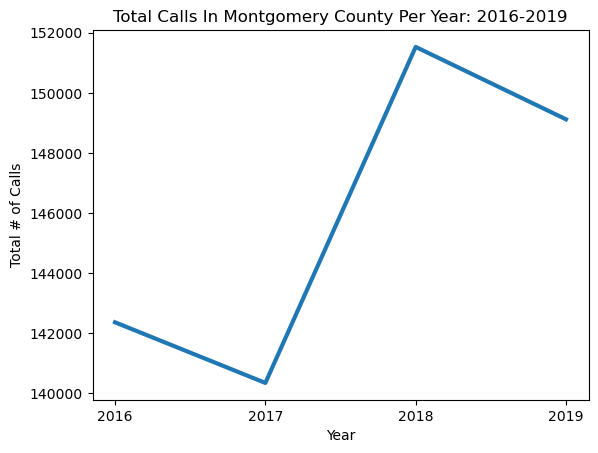

In [234]:
maincalls["year"].value_counts().sort_index().plot(kind="line", 
      linewidth=3,
      use_index=True, 
      xticks=[2016,2017,2018,2019], 
      title="Total Calls In Montgomery County Per Year: 2016-2019", 
      xlabel="Year", 
      ylabel="Total # of Calls")

None

##### As evidenced above, total call counts did not necessary increase every year.

## 2: DATAFRAMES OF SUBTYPES

#### Create 3 data frames--one with with only EMS calls, one with only FIRE calls, and one with only TRAFFIC calls

In [235]:
EMSONLY=maincalls[maincalls["calltype"]=="EMS"]

In [236]:
FIREONLY=maincalls[maincalls["calltype"]=="Fire"]

In [237]:
TRAFFICONLY=maincalls[maincalls["calltype"]=="Traffic"]


## 3: FIND THE TOP 10 CATEGORIES OF EMS CALL

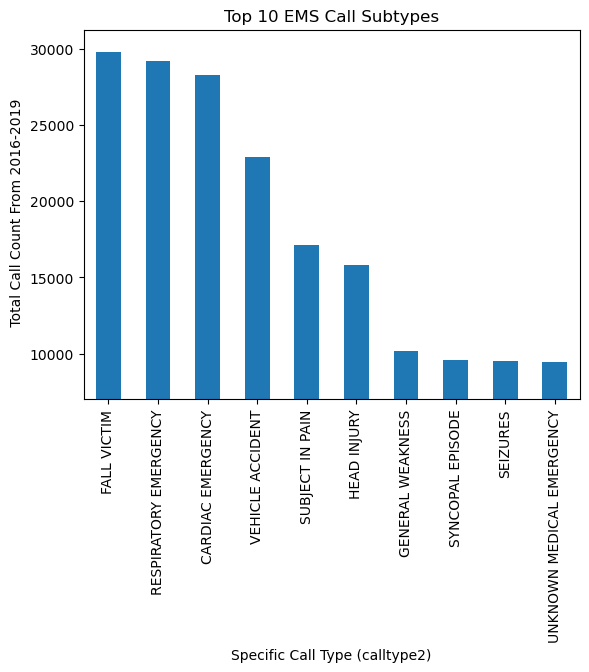

In [238]:
TopTenEMSCategories=EMSONLY.calltype2.value_counts().head(10)
TopTenEMSCategories.plot(kind="bar", 
                         xlabel="Specific Call Type (calltype2)", 
                         ylabel=" Total Call Count From 2016-2019", 
                         title="Top 10 EMS Call Subtypes", ylim=7000)

None

Observations:
1. Training curriculum can be altered to more closely reflect the prevalence of calls. For instance, special care should be given to handling fall victims--more so than, say, overdose victims (ranked 14)

### 3a: FIND THE TOP 10 CATEGORIES OF EMS CALL BY TOWNSHIP

##### The top calls can be pulled from each TOWNSHIP, as well. All that needs to be done is to change the township variable accordingly

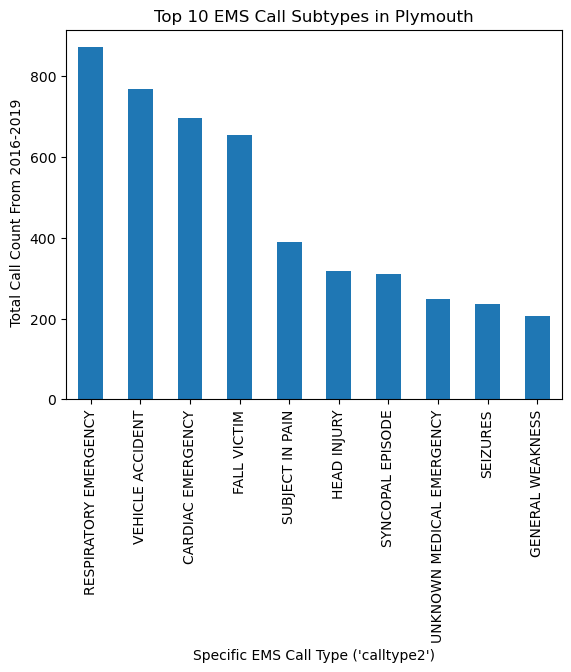

In [239]:
township="Plymouth"
TopTenEMSCategoriesByTownship=EMSONLY[EMSONLY["twp"]==township.upper()].calltype2.value_counts().head(10)
TopTenEMSCategoriesByTownship.plot(kind="bar", 
                                   xlabel="Specific EMS Call Type ('calltype2')", 
                                   ylabel=" Total Call Count From 2016-2019", 
                                   title="Top 10 EMS Call Subtypes in "+township)

None

For instance, in Plymouth, there were actually more Vehicle Accident calls than either Cardiac Emergency or Fall Victim Calls.

## 4: FIND THE TOP 10 CATEGORIES OF FIRE CALL


###### Total number of Fire calls between 2016 and 2019

In [240]:
FIREONLY['e'].count()

87528

#####  Create dataframe with the value counts and add percentage of total fire calls

In [241]:

allFIRECategories=FIREONLY.calltype2.value_counts().to_frame()
allFIRECategories.reset_index(inplace=True)
allFIRECategories['percentage']= (allFIRECategories.calltype2/allFIRECategories.calltype2.sum()*100).round(2)
allFIRECategories.rename(columns={'calltype2': 'Call_Count', 'index':'calltype2', 'percentage': 'Percentage'}, inplace=True)

In [242]:
allFIRECategories.head()

,calltype2,Call_Count,Percentage
0,FIRE ALARM,33598,38.39
1,VEHICLE ACCIDENT,9677,11.06
2,FIRE INVESTIGATION,8121,9.28
3,GAS-ODOR/LEAK,5895,6.73
4,ELECTRICAL FIRE OUTSIDE,4227,4.83


In [243]:
TopTenFIRECategories=allFIRECategories.head(10)


In [244]:
TopTenFIRECategories

,calltype2,Call_Count,Percentage
0,FIRE ALARM,33598,38.39
1,VEHICLE ACCIDENT,9677,11.06
2,FIRE INVESTIGATION,8121,9.28
3,GAS-ODOR/LEAK,5895,6.73
4,ELECTRICAL FIRE OUTSIDE,4227,4.83
5,BUILDING FIRE,4156,4.75
6,FIRE SPECIAL SERVICE,3500,4.0
7,CARBON MONOXIDE DETECTOR,3339,3.81
8,VEHICLE FIRE,2857,3.26
9,WOODS/FIELD FIRE,2144,2.45


###### Add an additional row with all other calls (not in the top 10)

In [330]:

TopTenFIRECategories.loc[10] =['ALL OTHER CALLS (not in top 10)'
,allFIRECategories.Call_Count.sum()-TopTenFIRECategories.Call_Count.loc[0:9].sum() 
,(((allFIRECategories.Call_Count.sum()-TopTenFIRECategories.Call_Count.loc[0:9].sum())
   /allFIRECategories.Call_Count.sum())*100).round(2)
]


In [331]:
TopTenFIRECategories

,calltype2,Call_Count,Percentage
0,FIRE ALARM,33598,38.39
1,VEHICLE ACCIDENT,9677,11.06
2,FIRE INVESTIGATION,8121,9.28
3,GAS-ODOR/LEAK,5895,6.73
4,ELECTRICAL FIRE OUTSIDE,4227,4.83
5,BUILDING FIRE,4156,4.75
6,FIRE SPECIAL SERVICE,3500,4.0
7,CARBON MONOXIDE DETECTOR,3339,3.81
8,VEHICLE FIRE,2857,3.26
9,WOODS/FIELD FIRE,2144,2.45


### 4a: CREATE PIE CHART OF 10 POST POPULAR CALL TYPES AND REMAINING CALL TYPES

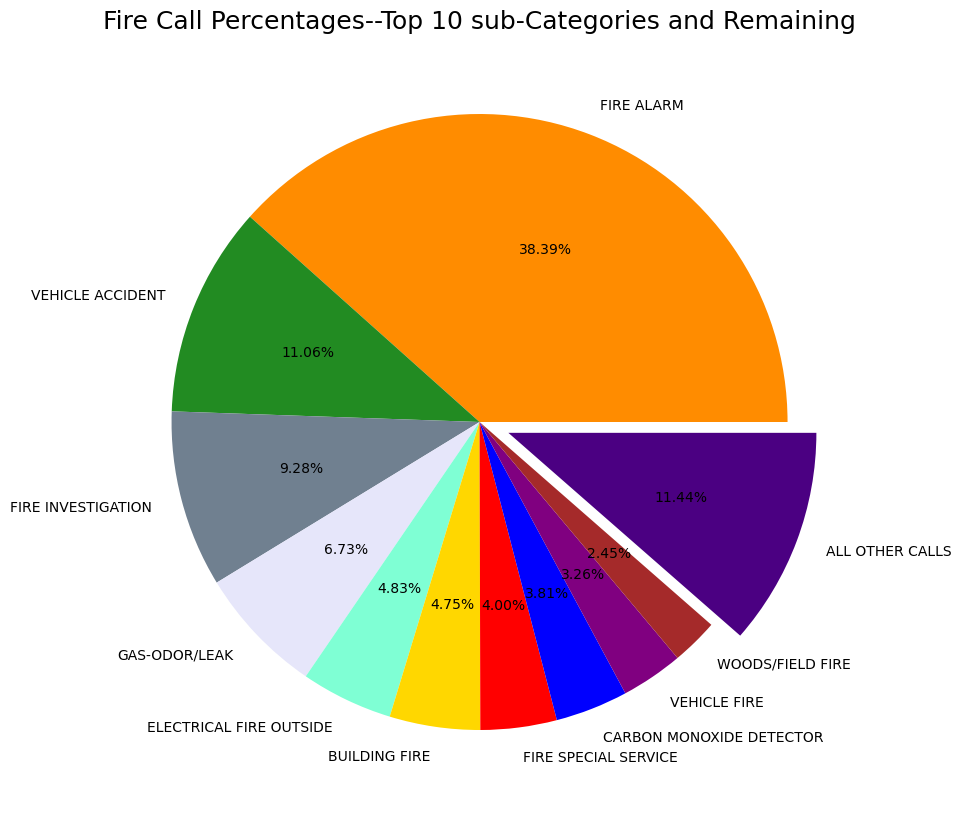

In [247]:
fig = plt.figure(figsize=(16,10))
myexplode = [0,0,0,0,0,0,0,0,0,0,0.1]
cols=['darkorange', 'forestgreen', 'slategrey', 'lavender', 
      'aquamarine', 'gold', 'red', 'blue', 'purple', 'brown', 'indigo', 'snow']
plt.title("Fire Call Percentages--Top 10 sub-Categories and Remaining", fontsize=18)
plt.pie(TopTenFIRECategories['Percentage'],
        colors=cols,labels=TopTenFIRECategories['calltype2'],
        autopct='%1.2f%%',
        explode = myexplode, 
        textprops={'fontsize': 10})
None

* As evidenced by the chart, the top 10 call categories acounted for approximately 88.5% of all FIRE calls in Montgomery County. 
* Note that the same exercise can indeed performed for Traffic calls, but this does not yield us useful information, as there are only 7 unique sub-categories of call.

# 5: FIND THE TOTAL FIRE CALLS EACH YEAR FROM 2016-2019 AND EXAMINE TRENDS BETWEEN YEARS.

#### Obtain series with number of incidents within each year

In [248]:
fireonlyseries=FIREONLY["year"].value_counts().sort_index()

In [249]:
fireonlyseries

2016    21577
2017    20553
2018    23126
2019    22272
Name: year, dtype: int64

#### Plot series in a bar chart

<AxesSubplot:title={'center':'Total Fire Calls Per Year'}, xlabel='Year', ylabel='Fire Incident Count'>

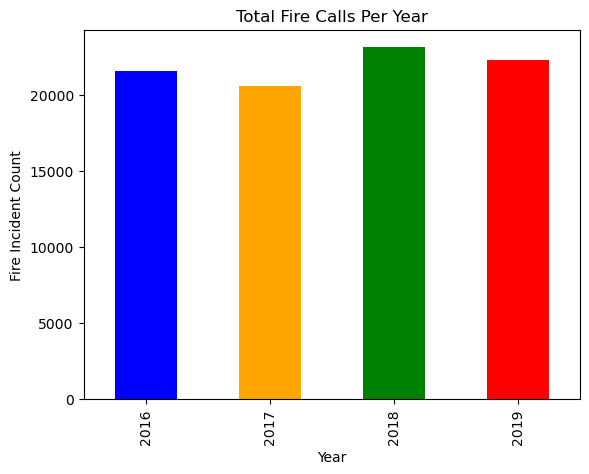

In [250]:

cols=['blue', 'orange', 'green', 'red']
fireonlyseries.plot(kind="bar", 
                    label=True, xlabel= "Year", 
                    color=cols, ylabel="Fire Incident Count", 
                    title="Total Fire Calls Per Year")


* Note that Fire calls alone did not rise every year

# 6: FIND THE TOTAL EMS CALLS EACH YEAR FROM 2016-2019 AND EXAMINE TRENDS BETWEEN YEARS.

#### Obtain series with number of EMS incidents within each year

In [251]:
totalEMSCallsByYear=EMSONLY["year"].value_counts(ascending=True).sort_index()
totalEMSCallsByYear

2016    70127
2017    71053
2018    72587
2019    75006
Name: year, dtype: int64

#### Plot series in a bar chart

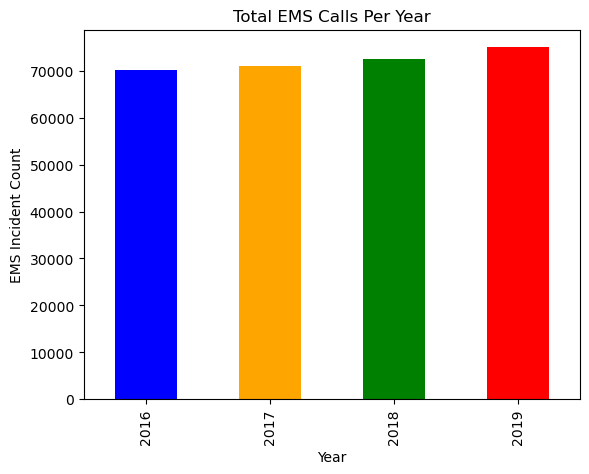

In [252]:
totalEMSCallsByYear.plot(kind="bar",
                         xlabel='Year',
                         ylabel="EMS Incident Count", 
                         color=cols, 
                         title="Total EMS Calls Per Year")
None

* Note that EMS calls DID rise consistently every year

# 7: FIND THE TOTAL TRAFFIC CALLS EACH YEAR FROM 2016-2019 AND EXAMINE TRENDS BETWEEN YEARS.

In [253]:
totalTRAFFICCallsByYear=TRAFFICONLY["year"].value_counts(ascending=True).sort_index()

In [254]:
totalTRAFFICCallsByYear

2016    50656
2017    48737
2018    55814
2019    51840
Name: year, dtype: int64

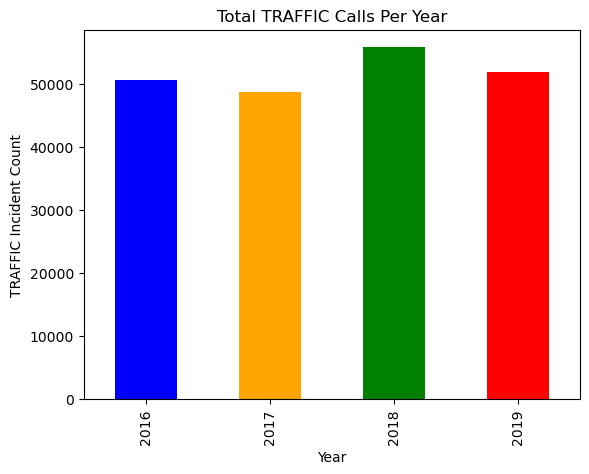

In [255]:
totalTRAFFICCallsByYear.plot(kind="bar",xlabel='Year',ylabel="TRAFFIC Incident Count", color=cols, title="Total TRAFFIC Calls Per Year")

None

* Note that traffic calls did not necessarily rise each year between 2016-2019

## 8: COMPARE TRENDS IN TOTAL EMS, FIRE, AND TRAFFIC CALLS EACH YEAR FROM 2016-2019

#### Group ALL calls by main call type (EMS/FIRE/TRAFFIC) and year

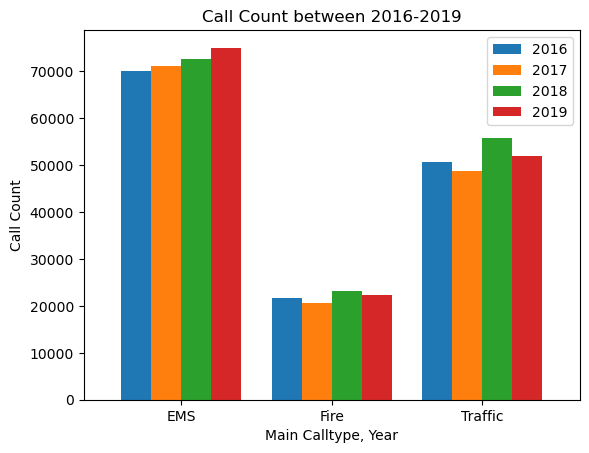

In [256]:

maincallsGroupedByCallTypeAndYear=maincalls.groupby(["calltype", "year",])['e'].count()
maincallsGroupedByCallTypeAndYear.unstack().plot(kind="bar",
                                                 ylabel="Call Count", 
                                                 rot=0, 
                                                 xlabel="Main Calltype, Year", 
                                                 width=.8, 
                                                 title="Call Count between 2016-2019")
plt.legend(loc='upper right')



* Only EMS calls increased steadily from 2016-2019

### 8a: CREATE ALTERNATIVE VISUALIZATION USING MATPLOTLIB 



In [257]:
maincallsGroupedByCallTypeAndYearDF = maincallsGroupedByCallTypeAndYear.to_frame()
maincallsGroupedByCallTypeAndYearDF=maincallsGroupedByCallTypeAndYearDF.unstack(level=0)

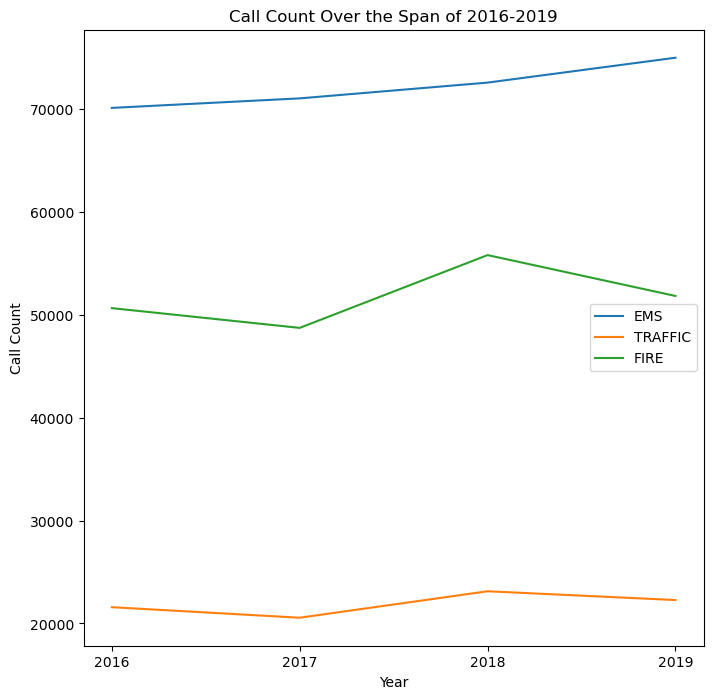

In [258]:
plt.figure(figsize=(8,8))
plt.plot(maincallsGroupedByCallTypeAndYearDF)
plt.xticks([2016,2017,2018,2019])
plt.legend(["EMS", "TRAFFIC", "FIRE"])
plt.title("Call Count Over the Span of 2016-2019")
plt.xlabel("Year")
plt.ylabel("Call Count")
None

Observations:
1. This visualization shows us clearly that EMS (and only EMS) call volume increased steadily each year from 2016-2019


## 9: FIND THE AVERAGE NUMBER OF DAILY FIRE CALLS BY MONTH OVER THE COURSE OF A YEAR

#### Generate a data frame with the month and average daily FIRE call count for 2016

In [259]:
d2016=FIREONLY[FIREONLY["year"]==2016].groupby(["year", "month", "date"])["e"].count()
meanDailyCountByMonth2016=d2016.groupby(["year", "month"]).mean()
meanDailyCountByMonth2016=meanDailyCountByMonth2016.to_frame()
meanDailyCountByMonth2016=meanDailyCountByMonth2016.unstack(level=0)


#### Generate a data frame with the month and average daily FIRE call count for 2017

In [260]:
d2017=FIREONLY[FIREONLY["year"]==2017].groupby(["year", "month", "date"])["e"].count()
meanDailyCountByMonth2017=d2017.groupby(["year", "month"]).mean()
meanDailyCountByMonth2017=meanDailyCountByMonth2017.to_frame()
meanDailyCountByMonth2017=meanDailyCountByMonth2017.unstack(level=0)

#### Generate a data frame with the month and average daily FIRE call count for 2018

In [261]:

d2018=FIREONLY[FIREONLY["year"]==2018].groupby(["year", "month", "date"])["e"].count()
meanDailyCountByMonth2018=d2018.groupby(["year", "month"]).mean()
meanDailyCountByMonth2018=meanDailyCountByMonth2018.to_frame()
meanDailyCountByMonth2018=meanDailyCountByMonth2018.unstack(level=0)

#### Generate a data frame with the month and average daily FIRE call count for 2019

In [262]:

d2019=FIREONLY[FIREONLY["year"]==2019].groupby(["year", "month", "date"])["e"].count()
meanDailyCountByMonth2019=d2019.groupby(["year", "month"]).mean()
meanDailyCountByMonth2019=meanDailyCountByMonth2019.to_frame()
meanDailyCountByMonth2019=meanDailyCountByMonth2019.unstack(level=0)

### 9a: View each year individually; Average Number of fire calls per day depending on month

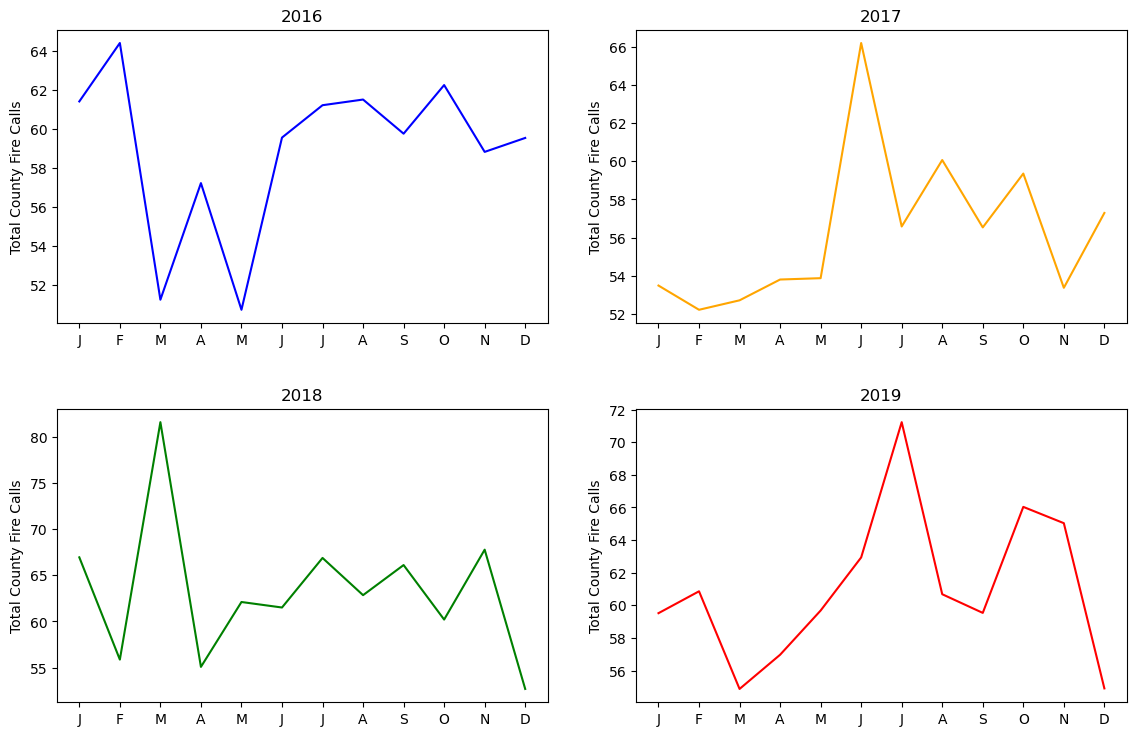

In [263]:

import matplotlib.pyplot as plt
months=["J", "F", "M", "A", "M","J","J","A","S","O","N","D"]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(meanDailyCountByMonth2016, color='blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("2016")
plt.ylabel("Total County Fire Calls")


plt.subplot(2,2,2)
plt.plot(meanDailyCountByMonth2017, color='orange')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("2017")
plt.ylabel("Total County Fire Calls")



plt.subplot(2,2,3)
plt.plot(meanDailyCountByMonth2018, color="green")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("2018")
plt.ylabel("Total County Fire Calls")



plt.subplot(2,2,4)
plt.plot(meanDailyCountByMonth2019, color='red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("2019")
plt.ylabel("Total County Fire Calls")
plt.tight_layout(pad=3)



### 9b: View all years in one graph; This helps us better identify consistencies between the years.

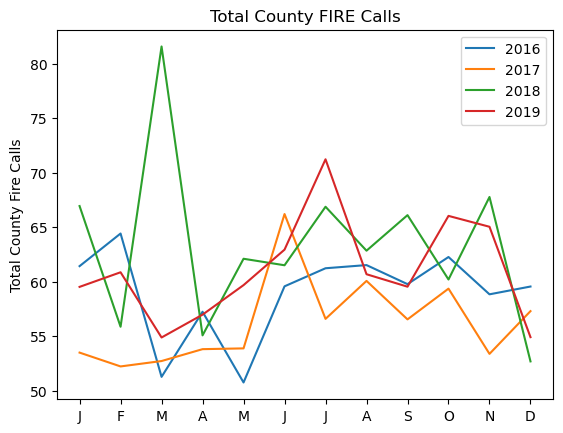

In [264]:

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("Total County FIRE Calls")
plt.plot(meanDailyCountByMonth2016, label="2016")
plt.plot(meanDailyCountByMonth2017, label="2017")
plt.plot(meanDailyCountByMonth2018, label="2018")
plt.plot(meanDailyCountByMonth2019, label="2019")
plt.ylabel("Total County Fire Calls")
plt.legend(loc=1)
None

Observations:

* There is no obvious correlation between month and number of fire calls- No discernable pattern of increases or decreases between the years.

* It is important to measure the daily average and not the monthly total, as not all months are equal in length. February will have fewer calls as it is as much as 3 days shorter than some months.

## 10: AVERAGE DAILY EMS CALLS BY MONTH OVER COURSE OF A YEAR

#### Generate a data frame with the month and average daily EMS call count for 2016

In [265]:
e2016=EMSONLY[EMSONLY["year"]==2016].groupby(["year", "month", "date"])["e"].count()
meanDailyEMSCountByMonth2016=e2016.groupby(["year", "month"]).mean()
meanDailyEMSCountByMonth2016=meanDailyEMSCountByMonth2016.to_frame()
meanDailyEMSCountByMonth2016=meanDailyEMSCountByMonth2016.unstack(level=0)

#### Generate a data frame with the month and average daily EMS call count for 2017

In [266]:
e2017=EMSONLY[EMSONLY["year"]==2017].groupby(["year", "month", "date"])["e"].count()
meanDailyEMSCountByMonth2017=e2017.groupby(["year", "month"]).mean()
meanDailyEMSCountByMonth2017=meanDailyEMSCountByMonth2017.to_frame()
meanDailyEMSCountByMonth2017=meanDailyEMSCountByMonth2017.unstack(level=0)

#### Generate a data frame with the month and average daily EMS call count for 2018

In [267]:
e2018=EMSONLY[EMSONLY["year"]==2018].groupby(["year", "month", "date"])["e"].count()
meanDailyEMSCountByMonth2018=e2018.groupby(["year", "month"]).mean()
meanDailyEMSCountByMonth2018=meanDailyEMSCountByMonth2018.to_frame()
meanDailyEMSCountByMonth2018=meanDailyEMSCountByMonth2018.unstack(level=0)

#### Generate a data frame with the month and average daily EMS call count for 2019

In [268]:
e2019=EMSONLY[EMSONLY["year"]==2019].groupby(["year", "month", "date"])["e"].count()
meanDailyEMSCountByMonth2019=e2019.groupby(["year", "month"]).mean()
meanDailyEMSCountByMonth2019=meanDailyEMSCountByMonth2019.to_frame()
meanDailyEMSCountByMonth2019=meanDailyEMSCountByMonth2019.unstack(level=0)

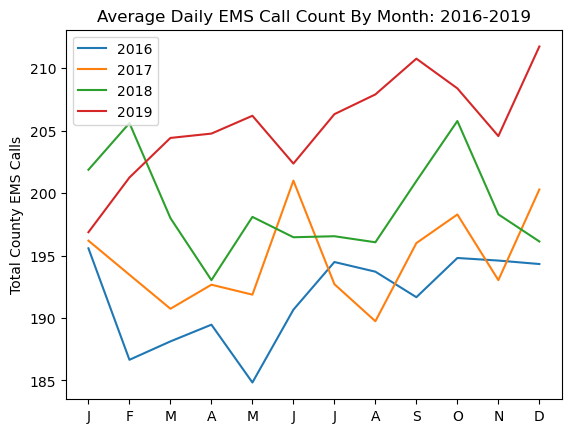

In [269]:


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("Average Daily EMS Call Count By Month: 2016-2019")
plt.plot(meanDailyEMSCountByMonth2016, label="2016")
plt.plot(meanDailyEMSCountByMonth2017, label="2017")
plt.plot(meanDailyEMSCountByMonth2018, label="2018")
plt.plot(meanDailyEMSCountByMonth2019, label="2019")
plt.ylabel("Total County EMS Calls")
plt.legend(loc=2)
None

 * The varied trends point to the randomness in the world of EMS. These graphs do not point to any obvious correlation between call count and month.

## 11: AVERAGE DAILY **TRAFFIC** CALLS BY MONTH OVER COURSE OF A YEAR

#### Generate a data frame with the month and average daily TRAFFIC call count for 2016

In [270]:
t2016=TRAFFICONLY[TRAFFICONLY["year"]==2016].groupby(["year", "month", "date"])["e"].count()
meanDailyTRAFFICCountByMonth2016=t2016.groupby(["year", "month"]).mean()
meanDailyTRAFFICCountByMonth2016=meanDailyTRAFFICCountByMonth2016.to_frame()
meanDailyTRAFFICCountByMonth2016=meanDailyTRAFFICCountByMonth2016.unstack(level=0)

#### Generate a data frame with the month and average daily TRAFFIC call count for 2017

In [271]:
t2017=TRAFFICONLY[TRAFFICONLY["year"]==2017].groupby(["year", "month", "date"])["e"].count()
meanDailyTRAFFICCountByMonth2017=t2017.groupby(["year", "month"]).mean()
meanDailyTRAFFICCountByMonth2017=meanDailyTRAFFICCountByMonth2017.to_frame()
meanDailyTRAFFICCountByMonth2017=meanDailyTRAFFICCountByMonth2017.unstack(level=0)

#### Generate a data frame with the month and average daily TRAFFIC call count for 2018

In [272]:
t2018=TRAFFICONLY[TRAFFICONLY["year"]==2018].groupby(["year", "month", "date"])["e"].count()
meanDailyTRAFFICCountByMonth2018=t2018.groupby(["year", "month"]).mean()
meanDailyTRAFFICCountByMonth2018=meanDailyTRAFFICCountByMonth2018.to_frame()
meanDailyTRAFFICCountByMonth2018=meanDailyTRAFFICCountByMonth2018.unstack(level=0)

#### Generate a data frame with the month and average daily TRAFFIC call count for 2019

In [273]:
t2019=TRAFFICONLY[TRAFFICONLY["year"]==2019].groupby(["year", "month", "date"])["e"].count()
meanDailyTRAFFICCountByMonth2019=t2019.groupby(["year", "month"]).mean()
meanDailyTRAFFICCountByMonth2019=meanDailyTRAFFICCountByMonth2019.to_frame()
meanDailyTRAFFICCountByMonth2019=meanDailyTRAFFICCountByMonth2019.unstack(level=0)

#### Plot the data

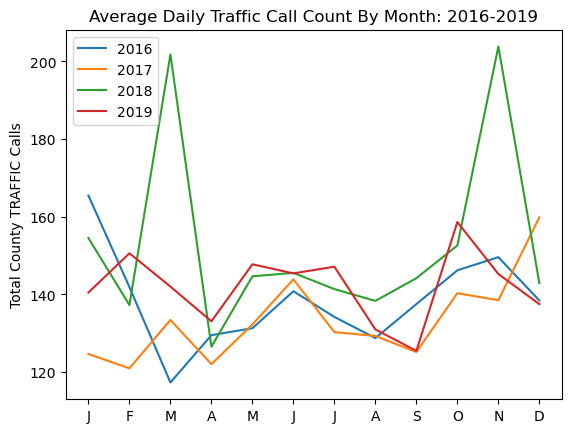

In [274]:
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=months)
plt.title("Average Daily Traffic Call Count By Month: 2016-2019")
plt.plot(meanDailyTRAFFICCountByMonth2016, label="2016")
plt.plot(meanDailyTRAFFICCountByMonth2017, label="2017")
plt.plot(meanDailyTRAFFICCountByMonth2018, label="2018")
plt.plot(meanDailyTRAFFICCountByMonth2019, label="2019")

plt.ylabel("Total County TRAFFIC Calls")

plt.legend(loc=2)
None

* The data are not sufficient to predict whether traffic count will increase depending on the month
    * For instance, in 2018, average daily traffic call count increases in March and November, but in 2019, but does not do so in either of those months.

## 12: IDENTIFY TOWNSHIPS WITH HIGHEST CALL VOLUME--EMS, FIRE, AND TRAFFIC

### 12a: Townships with highest EMS call volume

#### Create data frame for each year; Take the EMS subset, group by the township, take the call count, sort by largest to smallest, and take the top 10--for each year


In [275]:
twpgroupEMS2016=EMSONLY[EMSONLY["year"]==2016].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()


In [276]:
twpgroupEMS2017=EMSONLY[EMSONLY["year"]==2017].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [277]:
twpgroupEMS2018=EMSONLY[EMSONLY["year"]==2018].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [278]:
twpgroupEMS2019=EMSONLY[EMSONLY["year"]==2019].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

#### Plot the data

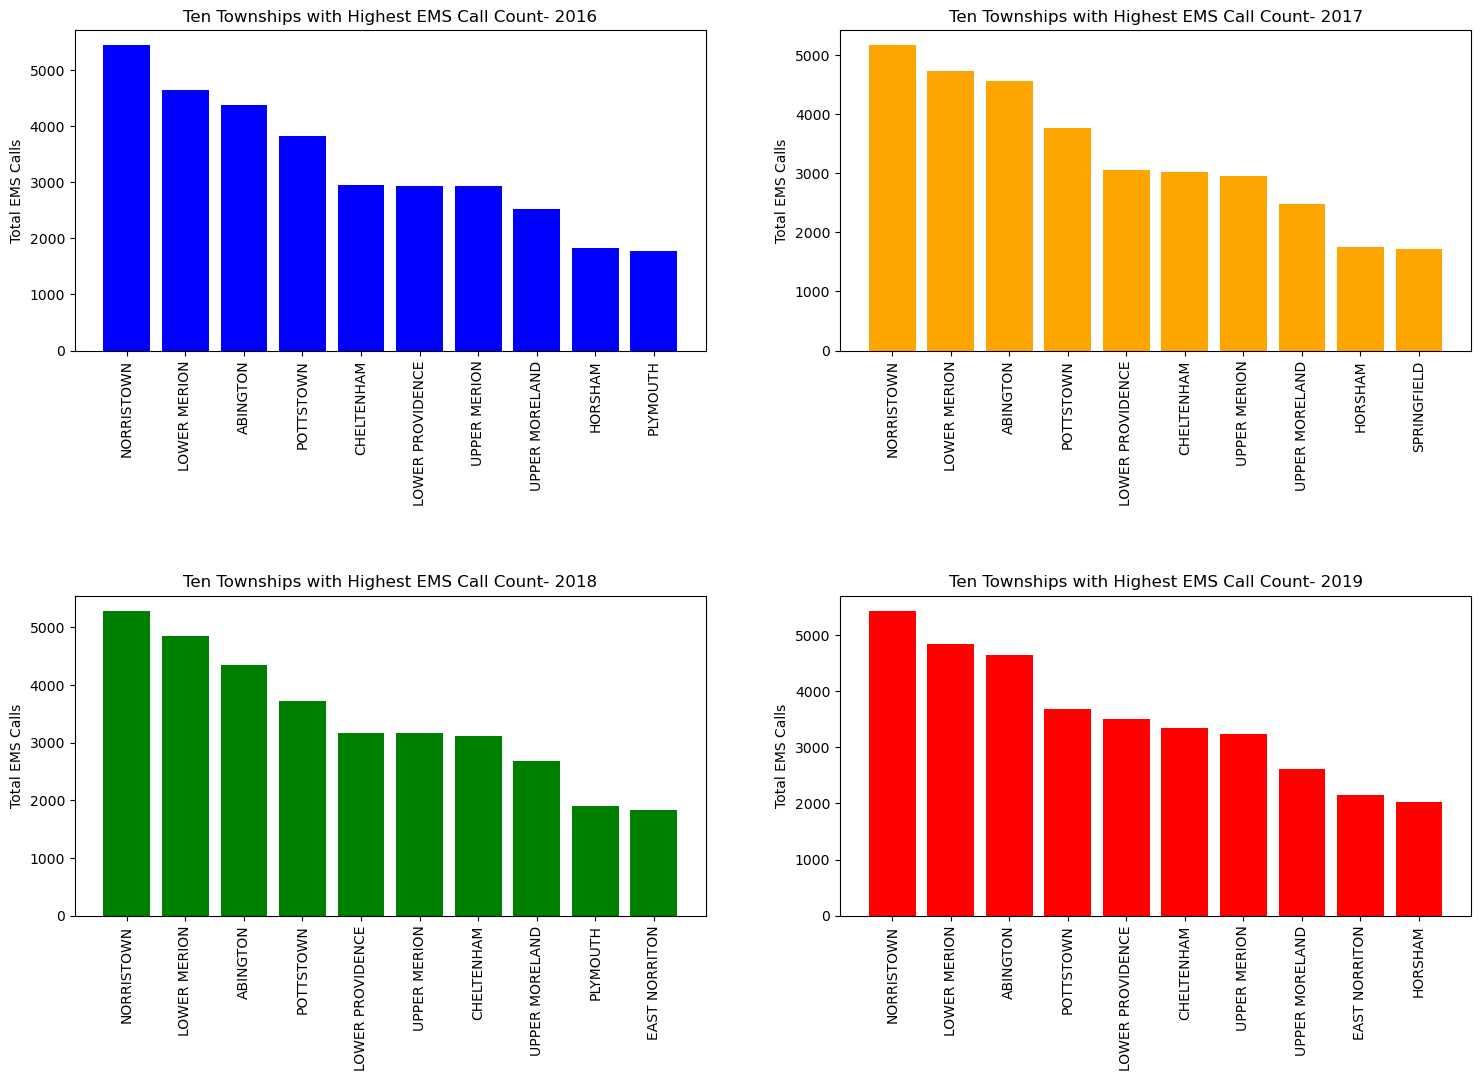

In [279]:
plt.figure(figsize=(16,12))
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.bar(x=twpgroupEMS2016['twp'], height=twpgroupEMS2016['e'], color='blue')
plt.title("Ten Townships with Highest EMS Call Count- 2016")
plt.ylabel("Total EMS Calls")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(x=twpgroupEMS2017['twp'], height=twpgroupEMS2017['e'], color='orange')
plt.title("Ten Townships with Highest EMS Call Count- 2017")
plt.ylabel("Total EMS Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,3)
plt.bar(x=twpgroupEMS2018['twp'], height=twpgroupEMS2018['e'], color='green')
plt.title("Ten Townships with Highest EMS Call Count- 2018")
plt.ylabel("Total EMS Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,4)
plt.bar(x=twpgroupEMS2019['twp'], height=twpgroupEMS2019['e'], color='red')
plt.title("Ten Townships with Highest EMS Call Count- 2019")
plt.ylabel("Total EMS Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)

### 12b Townships with highest FIRE call volume

#### Create data frame for each year; Take the FIRE subset, group by the township, take the call count, sort by largest to smallest, and take the top 10--for each year

In [280]:

twpgroupFIRE2016=FIREONLY[FIREONLY["year"]==2016].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()


In [281]:
twpgroupFIRE2017=FIREONLY[FIREONLY["year"]==2017].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [282]:
twpgroupFIRE2018=FIREONLY[FIREONLY["year"]==2018].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [283]:
twpgroupFIRE2019=FIREONLY[FIREONLY["year"]==2019].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

#### Plot the data

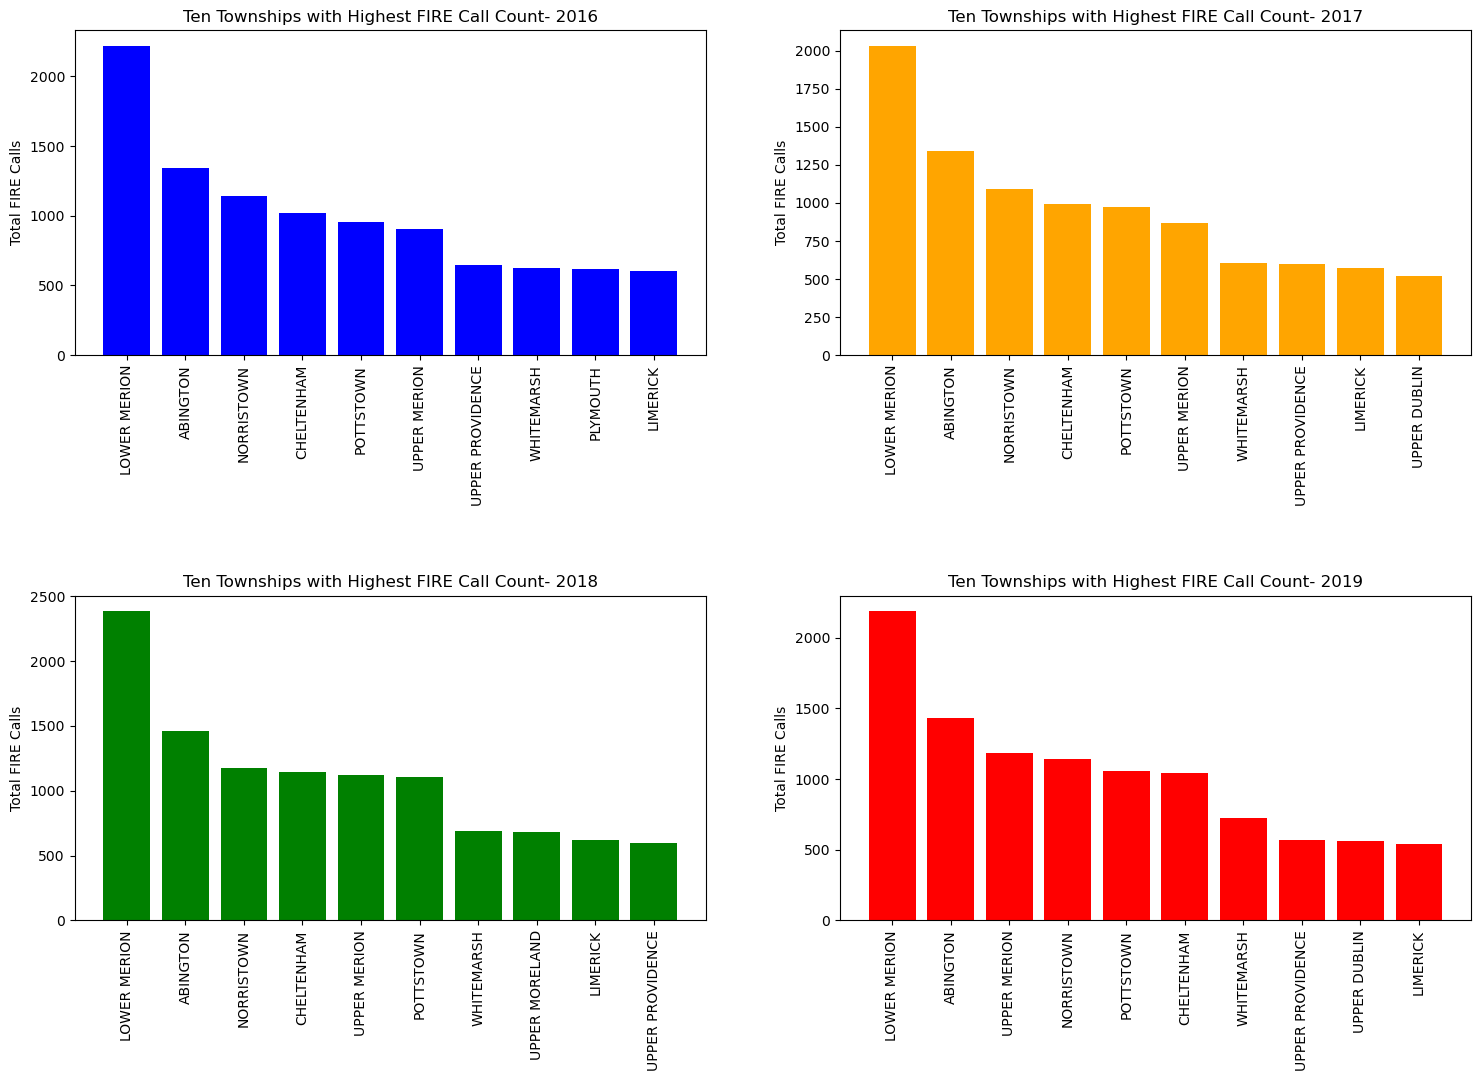

In [284]:

plt.figure(figsize=(16,12))
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.bar(x=twpgroupFIRE2016['twp'], height=twpgroupFIRE2016['e'], color='blue')
plt.title("Ten Townships with Highest FIRE Call Count- 2016")
plt.ylabel("Total FIRE Calls")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(x=twpgroupFIRE2017['twp'], height=twpgroupFIRE2017['e'], color='orange')
plt.title("Ten Townships with Highest FIRE Call Count- 2017")
plt.ylabel("Total FIRE Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,3)
plt.bar(x=twpgroupFIRE2018['twp'], height=twpgroupFIRE2018['e'], color='green')
plt.title("Ten Townships with Highest FIRE Call Count- 2018")
plt.ylabel("Total FIRE Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,4)
plt.bar(x=twpgroupFIRE2019['twp'], height=twpgroupFIRE2019['e'], color='red')
plt.title("Ten Townships with Highest FIRE Call Count- 2019")
plt.ylabel("Total FIRE Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)

### 12c: Townships with highest TRAFFIC call volume

#### Create data frame for each year; Take the TRAFFIC subset, group by the township, take the call count, sort by largest to smallest, and take the top 10--for each year

In [285]:
twpgroupTRAFFIC2016=TRAFFICONLY[TRAFFICONLY["year"]==2016].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [286]:
twpgroupTRAFFIC2017=TRAFFICONLY[TRAFFICONLY["year"]==2017].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [287]:
twpgroupTRAFFIC2018=TRAFFICONLY[TRAFFICONLY["year"]==2018].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

In [288]:
twpgroupTRAFFIC2019=TRAFFICONLY[TRAFFICONLY["year"]==2019].groupby(["twp"])["e"].count().sort_values(ascending=False)\
.head(10).to_frame().reset_index()

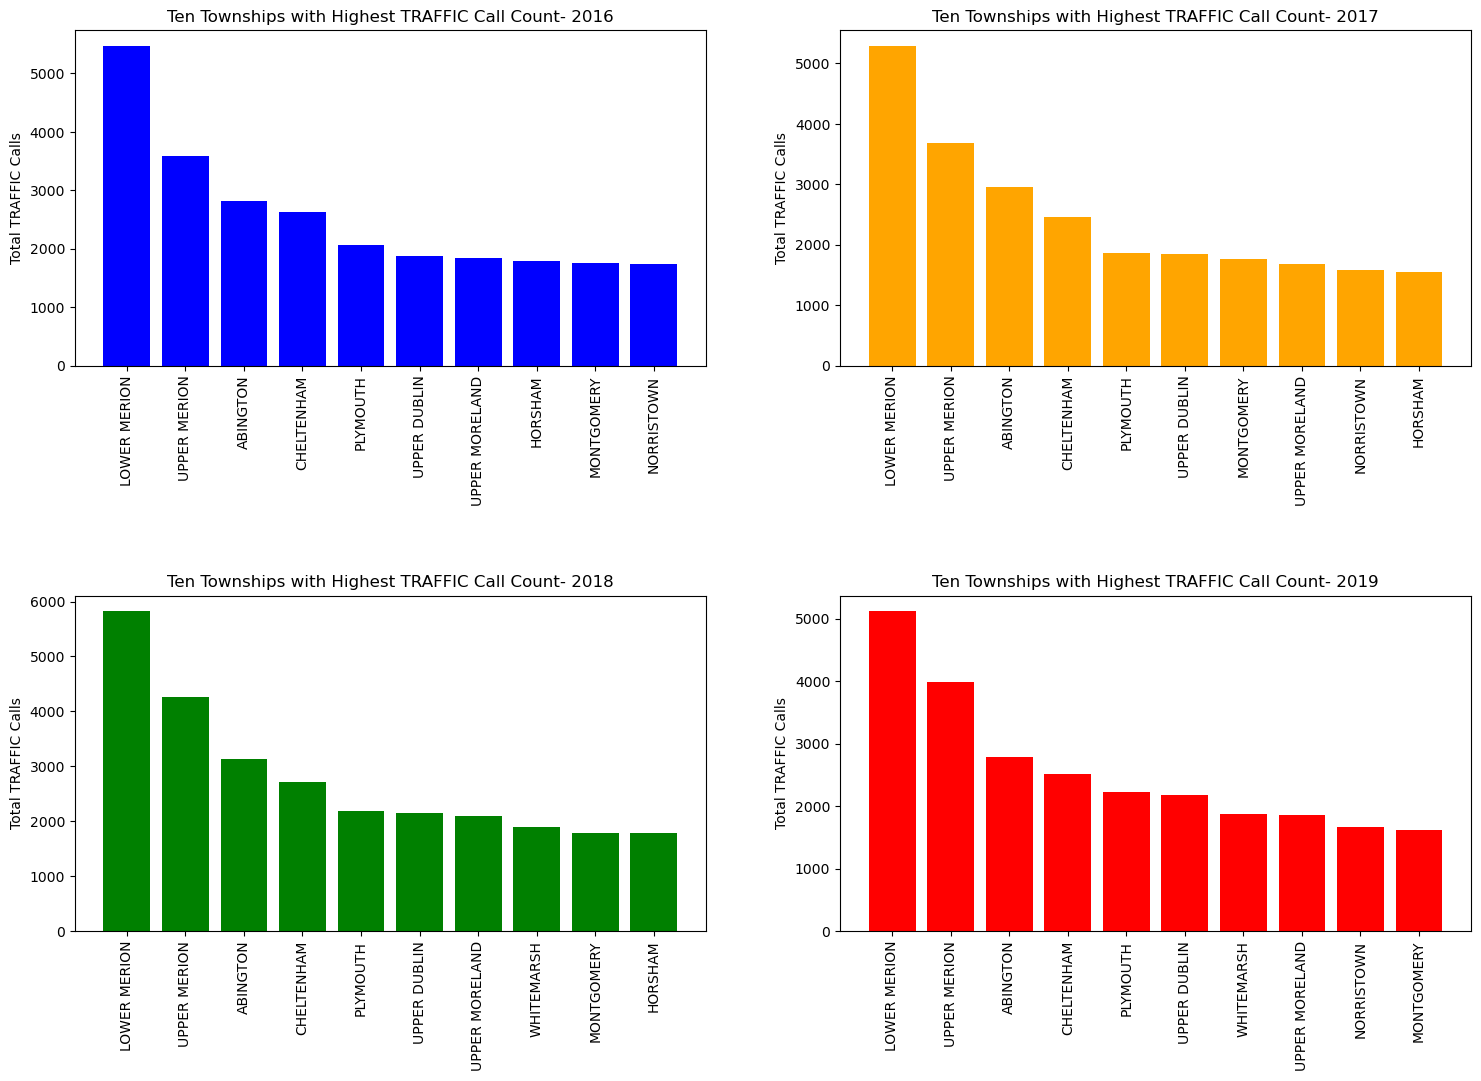

In [289]:
plt.figure(figsize=(16,12))
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.bar(x=twpgroupTRAFFIC2016['twp'], height=twpgroupTRAFFIC2016['e'], color='blue')
plt.title("Ten Townships with Highest TRAFFIC Call Count- 2016")
plt.ylabel("Total TRAFFIC Calls")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(x=twpgroupTRAFFIC2017['twp'], height=twpgroupTRAFFIC2017['e'], color='orange')
plt.title("Ten Townships with Highest TRAFFIC Call Count- 2017")
plt.ylabel("Total TRAFFIC Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,3)
plt.bar(x=twpgroupTRAFFIC2018['twp'], height=twpgroupTRAFFIC2018['e'], color='green')
plt.title("Ten Townships with Highest TRAFFIC Call Count- 2018")
plt.ylabel("Total TRAFFIC Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)


plt.subplot(2,2,4)
plt.bar(x=twpgroupTRAFFIC2019['twp'], height=twpgroupTRAFFIC2019['e'], color='red')
plt.title("Ten Townships with Highest TRAFFIC Call Count- 2019")
plt.ylabel("Total TRAFFIC Calls")
plt.xticks(rotation=90)
plt.tight_layout(pad=5)

Observations:

* A better metric (rather than just raw call count) would be the call count compared with the size and population of the township.

## 13: FIND THE AVERAGE HOURLY CALL COUNT BASED ON THE HOUR OF THE DAY

#### 13a: First start with ALL calls--EMS, FIRE, TRAFFIC combined

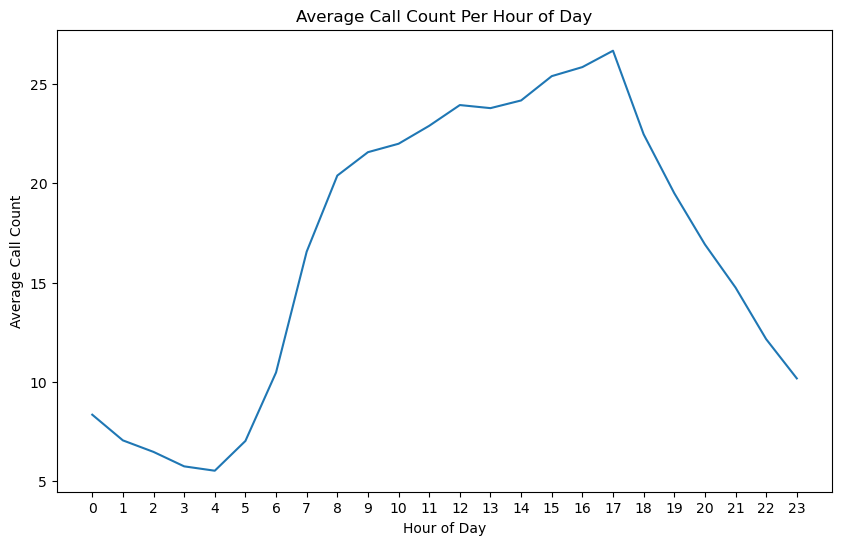

In [291]:
callsperhourperday=maincalls.groupby(["hour", "date"])["e"].count()
callsperhourperday=maincalls.groupby(["hour", "date"])["e"].count().to_frame()

bar=sns.lineplot(data=callsperhourperday, x="hour", y="e",  ci=None, legend=True)
bar.set(xlabel="Hour of Day", 
        ylabel="Average Call Count",
        title="Average Call Count Per Hour of Day")
fig=plt.gcf()
fig.set_size_inches(10,6)
bar.set_xticks(range(24))
None

Observations:
* The 5:00 PM hour had the most number of calls, while the 4:00 AM hour was the quietest
* Steady increase in calls from 6AM until after the 5:00 PM hour
* If training drills are in store, and are to be done with call count is lowest, they should be done right at the start of shift (0700) or after dinner

#### 13b: We then examine the TRAFFIC calls by themselves

In [292]:
TRAFFICcallsperhourperday=TRAFFICONLY.groupby(["hour", "date"])["e"].count()
TRAFFICcallsperhourperday=TRAFFICONLY.groupby(["hour", "date"])["e"].count().to_frame()

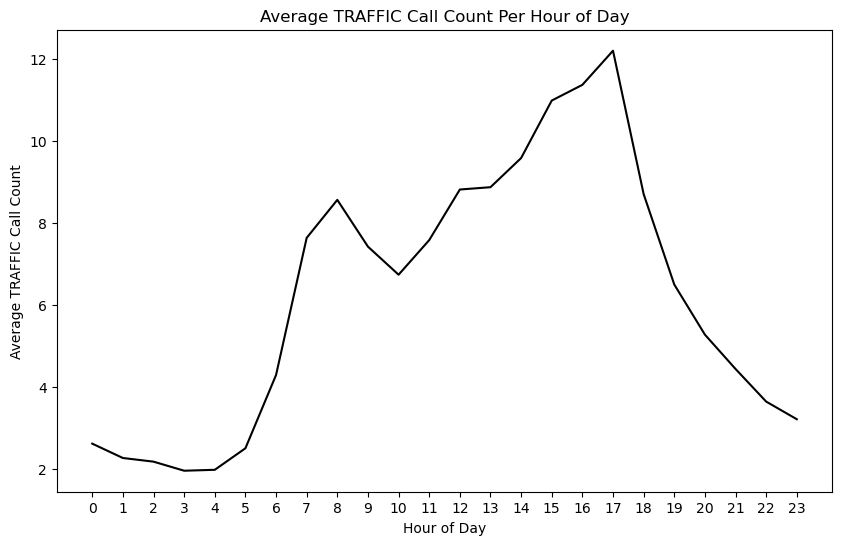

In [293]:
bar=sns.lineplot(data=TRAFFICcallsperhourperday, x="hour", y="e", ci=None, color="Black",legend=True)
bar.set(xlabel="Hour of Day", ylabel="Average TRAFFIC Call Count", title="Average TRAFFIC Call Count Per Hour of Day")
fig=plt.gcf()
fig.set_size_inches(10,6)
bar.set_xticks(range(24))
None

#### 13c: And then the FIRE calls

In [294]:
FIREcallsperhourperday=FIREONLY.groupby(["hour", "date"])["e"].count()
FIREcallsperhourperday=FIREONLY.groupby(["hour", "date"])["e"].count().to_frame()

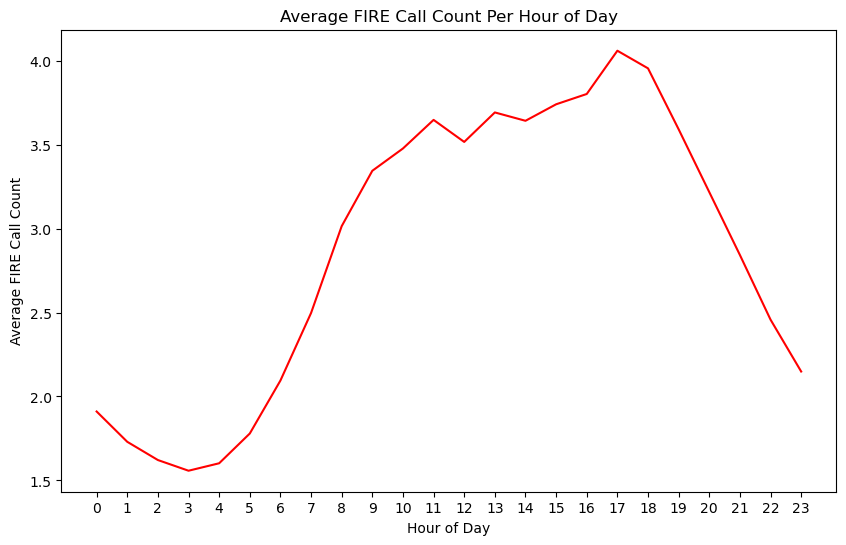

In [295]:
bar=sns.lineplot(data=FIREcallsperhourperday, x="hour", y="e", ci=None, color="Red", legend=True)
bar.set(xlabel="Hour of Day", ylabel="Average FIRE Call Count", title="Average FIRE Call Count Per Hour of Day")
fig=plt.gcf()
fig.set_size_inches(10,6)
bar.set_xticks(range(24))
None

#### 13d: And finally, we examine EMS calls

In [296]:
EMScallsperhourperday=EMSONLY.groupby(["hour", "date"])["e"].count()
EMScallsperhourperday=EMSONLY.groupby(["hour", "date"])["e"].count().to_frame()

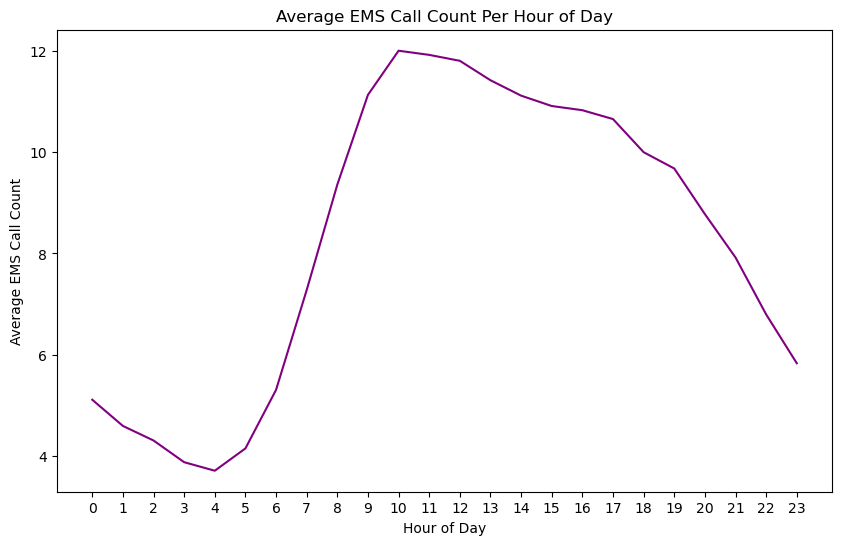

In [297]:
bar=sns.lineplot(data=EMScallsperhourperday, x="hour", y="e", ci=None, color="Purple",legend=True)
bar.set(xlabel="Hour of Day", ylabel="Average EMS Call Count", title="Average EMS Call Count Per Hour of Day")
fig=plt.gcf()
fig.set_size_inches(10,6)
bar.set_xticks(range(24))
None

#### 13d: We can then examine all alongside each other

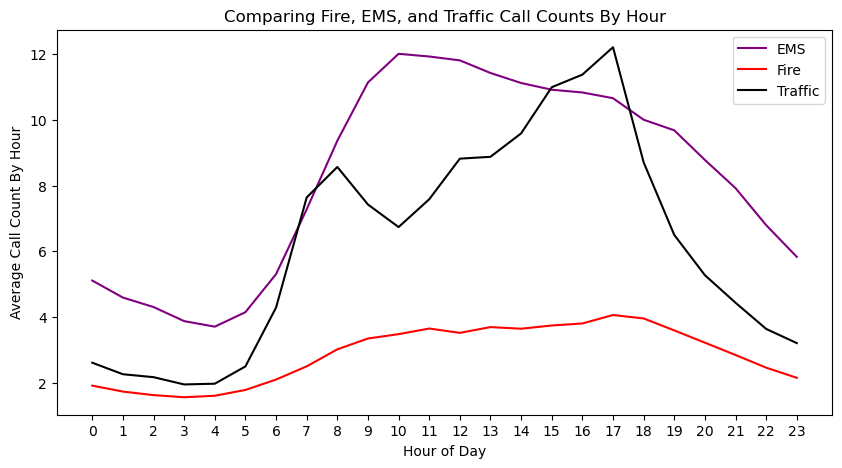

In [298]:

fig = plt.subplots(figsize=(10,5))

sns.lineplot(data=EMScallsperhourperday, x="hour", y="e", ci=None, color="Purple")
sns.lineplot(data=FIREcallsperhourperday, x="hour", y="e", ci=None,color="red")
sns.lineplot(data=TRAFFICcallsperhourperday, x="hour", y="e", ci=None, color="black")


plt.xticks(np.arange(0,24,1))
plt.title("Comparing Fire, EMS, and Traffic Call Counts By Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Call Count By Hour")
plt.legend(["EMS", "Fire", "Traffic"])
plt.show()




OBSERVATIONS:
* EMS calls peak in 10:00 hour, then decrease for the rest of the day

* TRAFFIC calls peak in the 8:00 hour, then drop until the 10:00 hour, then rise steadily until the 5:00 hour

* Fire calls rise between the 5:00AM hour and the 5:00 PM hour, then drop off again. 

* EMS and Traffic calls increase much more steeply

### 14: FIND THE AVERAGE DAILY CALL COUNT BASED ON THE DAY OF WEEK

### 14a: We start with all calls together

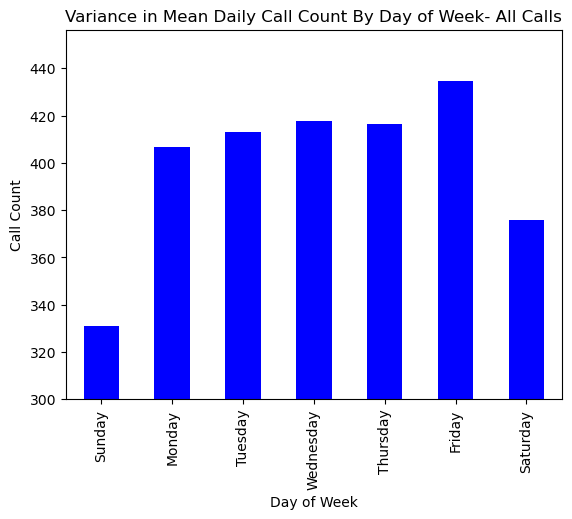

In [299]:

groupbydow=maincalls.groupby(["dayofweek", "date"]).count()['e'].sort_values()
groupbydow=groupbydow.to_frame()
groupbydow=groupbydow.rename(columns={'e':'Call Count'})

groupbydow=groupbydow.groupby("dayofweek")['Call Count'].mean().to_frame()
#create column with number of day of week so that days can be properly sorted
groupbydow['weekdayNumber']=[6, 2, 7, 1, 5, 3, 4]
groupbydow=groupbydow.sort_values('weekdayNumber')
groupbydow.plot(kind="bar", 
                y="Call Count", 
                xlabel= "Day of Week", 
                ylabel="Call Count", 
                title="Variance in Mean Daily Call Count By Day of Week- All Calls", 
                color='blue', 
                legend=False, 
                ylim=300)
None

Observations:

1. Overall, call count is DOWN on weekends, with a spike on Fridays.

#### 14b: We then look at TRAFFIC calls

In [300]:
TRAFFICcallsperhourperday=TRAFFICONLY.groupby(["dayofweek"])["e"].count()
TRAFFICcallsperhourperday=TRAFFICcallsperhourperday.to_frame()
#create column with number of day of week so that days can be properly sorted
TRAFFICcallsperhourperday['weekdayNumber']=[6, 2, 7, 1, 5, 3, 4]
TRAFFICcallsperhourperday=TRAFFICcallsperhourperday.rename(columns={'e':'Call Count'})
TRAFFICcallsperhourperday=TRAFFICcallsperhourperday.sort_values('weekdayNumber')

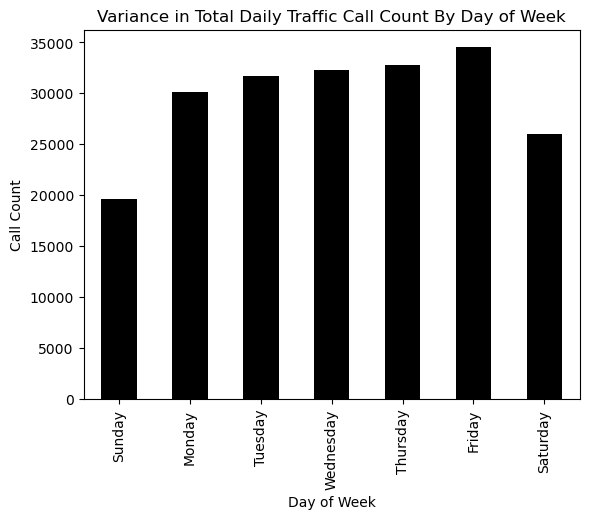

In [301]:
TRAFFICcallsperhourperday.head(10).plot(kind="bar", 
                                        y="Call Count", 
                                        xlabel= "Day of Week", 
                                        ylabel="Call Count", 
                                        title="Variance in Total Daily Traffic Call Count By Day of Week", 
                                        legend=False, color='Black')
None

Observations:
* Friday had the most traffic calls, with counts decreasing on Saturdays and Sundays

#### 14c: We then look at EMS calls

In [302]:
EMScallsperhourperday=EMSONLY.groupby(["dayofweek"])["e"].count()
EMScallsperhourperday=EMScallsperhourperday.to_frame()
#create column with number of day of week so that days can be properly sorted
EMScallsperhourperday['weekdayNumber']=[6, 2, 7, 1, 5, 3, 4]
EMScallsperhourperday=EMScallsperhourperday.rename(columns={'e':'Call Count'})
EMScallsperhourperday=EMScallsperhourperday.sort_values('weekdayNumber')

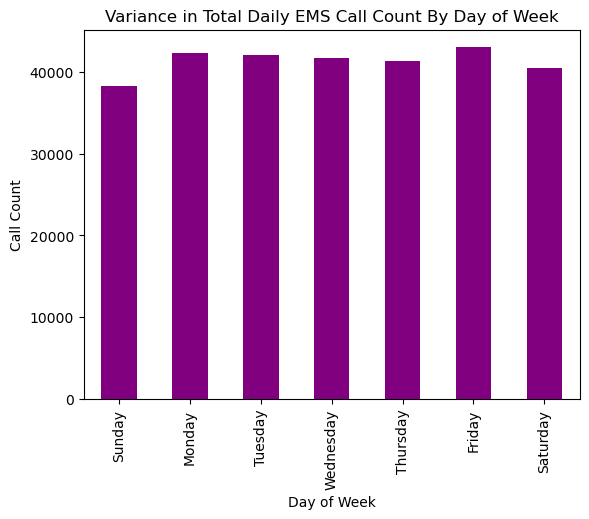

In [303]:
EMScallsperhourperday.head(10).plot(kind="bar", 
                                    y="Call Count", 
                                    xlabel= "Day of Week", 
                                    ylabel="Call Count", 
                                    title="Variance in Total Daily EMS Call Count By Day of Week", 
                                    legend=False, color='Purple')
None


* EMS calls also were highest on Fridays and lowest on Saturdays and Sundays, but not by a large percentage.

#### 14d: We then look at FIRE calls

In [304]:
FIREcallsperhourperday=FIREONLY.groupby(["dayofweek"])["e"].count()
FIREcallsperhourperday=FIREcallsperhourperday.to_frame()
#create column with number of day of week so that days can be properly sorted
FIREcallsperhourperday['weekdayNumber']=[6, 2, 7, 1, 5, 3, 4]
FIREcallsperhourperday=FIREcallsperhourperday.rename(columns={'e':'Call Count'})
FIREcallsperhourperday=FIREcallsperhourperday.sort_values('weekdayNumber')

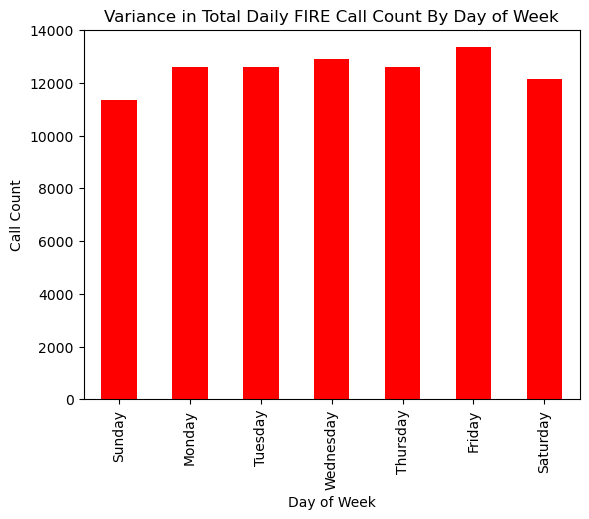

In [305]:
FIREcallsperhourperday.head(10).plot(kind="bar", 
                                     y="Call Count", 
                                     xlabel= "Day of Week", 
                                     ylabel="Call Count", 
                                     title="Variance in Total Daily FIRE Call Count By Day of Week", 
                                     legend=False, color='Red')
None

Observations:
* Fire activity is up on Fridays and down on Saturdays/Sundays, but not by a large margin.

## 15: EXAMINE CORRELATION BETWEEN DAY OR HOUR OF WEEK AND SPECIFIC CALL TYPE


### We can get any call type/sub type and the correlation between call count and the day of week and/or even the hour of the week.



#### For instance, just below, we are querying the number of EMS OVERDOSE-related calls based on day of week; 

In [307]:
#This gives us all the EMS calls with the specific calltype of "OVERDOSE". 
#This could mean any kind of substance; alcohol, narcotics, marijuana, etc
EMSONLY=EMSONLY.rename(columns={'twp':'township', "calltype2":"secondary_callType", 'e': "call_count"})
INTOXICATIONCALLS=EMSONLY[EMSONLY['secondary_callType']=="OVERDOSE"]


In [332]:
INTOXICATIONCALLS.head()

,lat,lng,desc,zip,title,timeStamp,township,addr,call_count,calltype,year,month,day,hour,date,dayofweek,secondary_callType
7940,40.085338,-75.396135,GULPH RD & MALL BLVD; UPPER MERION; Station 3...,19406,EMS: OVERDOSE,2016-01-01 01:55:46,UPPER MERION,GULPH RD & MALL BLVD,1,EMS,2016,1,1,1,2016-01-01,Friday,OVERDOSE
7946,40.314721,-75.392965,MORWOOD RD & CAMP RD; FRANCONIA; Station 344;...,18969,EMS: OVERDOSE,2016-01-01 02:02:19,FRANCONIA,MORWOOD RD & CAMP RD,1,EMS,2016,1,1,2,2016-01-01,Friday,OVERDOSE
7948,40.172314,-75.492728,MILL RD & DEAD END; UPPER PROVIDENCE; Station...,nan,EMS: OVERDOSE,2016-01-01 02:08:31,UPPER PROVIDENCE,MILL RD & DEAD END,1,EMS,2016,1,1,2,2016-01-01,Friday,OVERDOSE
7955,40.251107,-75.648444,HANOVER ST & E 4TH ST; POTTSTOWN; Station 329...,19464,EMS: OVERDOSE,2016-01-01 02:36:33,POTTSTOWN,HANOVER ST & E 4TH ST,1,EMS,2016,1,1,2,2016-01-01,Friday,OVERDOSE
7958,40.084352,-75.136730,SERPENTINE LN & PARDEE LN; CHELTENHAM; Statio...,19095,EMS: OVERDOSE,2016-01-01 02:54:54,CHELTENHAM,SERPENTINE LN & PARDEE LN,1,EMS,2016,1,1,2,2016-01-01,Friday,OVERDOSE


#### The below code gives us a data frame with each day of week and the sum of the OVERDOSE calls occuring on each day of week from 2016-2019. For instance There were 1246 OVERDOSE calls that occured on a Saturday

In [344]:
INTOXICATIONCALLSperhourperday=INTOXICATIONCALLS.groupby(["dayofweek"])["call_count"].count()
INTOXICATIONCALLSperhourperday=INTOXICATIONCALLSperhourperday.sort_values(ascending=False)
INTOXICATIONCALLSperhourperday=INTOXICATIONCALLSperhourperday.to_frame().sort_values('call_count', ascending=False)
INTOXICATIONCALLSperhourperday.index.name = 'Day of Week'
INTOXICATIONCALLSperhourperday.reset_index(inplace=True)
INTOXICATIONCALLSperhourperday

,Day of Week,call_count
0,Saturday,1246
1,Friday,1123
2,Sunday,1122
3,Monday,962
4,Wednesday,949
5,Thursday,932
6,Tuesday,922


Observations:

1: Top days of week for alcohol related calls are Saturday, Friday, and Sunday. 

2: Interestingly, there are more drinking-related calls on Monday than on Thursday.

In [350]:
INTOXICATIONCALLSperhourperday.call_count.sum()

7256

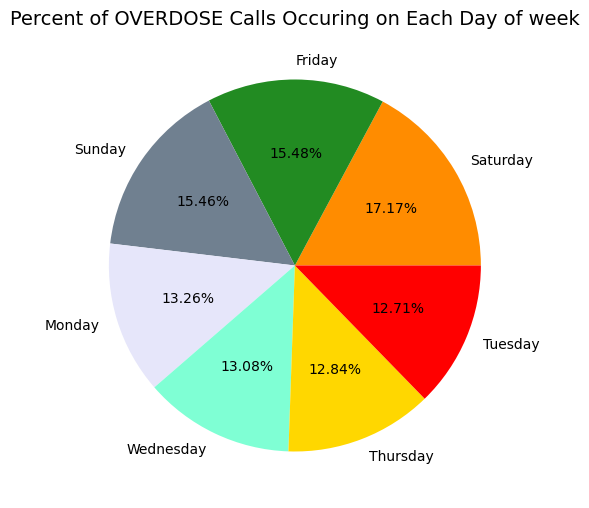

In [364]:
fig = plt.figure(figsize=(6,10))
cols=['darkorange', 'forestgreen', 'slategrey', 'lavender', 
      'aquamarine', 'gold', 'red', 'blue', 'purple', 'brown', 'indigo', 'snow']
plt.title("Percentage of OVERDOSE Calls Per Day of Week", fontsize=14)
plt.pie(INTOXICATIONCALLSperhourperday['call_count'],
        colors=cols,labels=INTOXICATIONCALLSperhourperday['Day of Week'],
        autopct='%1.2f%%',
        #explode = myexplode, 
        textprops={'fontsize': 10})
None

#### And in the code below, we are obtaining the number of EMS OVERDOSE calls based on specific HOUR of the week (i.e. 11PM on a Friday OR 5PM on a Tuesday); 
#### We end up with a data frame with each Day-of-Week/ Hour combination, and we dispaly the top 10 (those with the highest call counts)

In [334]:
INTOXICATIONCALLS_BY_HOUR_AND_DOW=INTOXICATIONCALLS.groupby(["dayofweek", 'hour'])["call_count"].count()
INTOXICATIONCALLS_BY_HOUR_AND_DOW=INTOXICATIONCALLS_BY_HOUR_AND_DOW.sort_values(ascending=False).head(10).to_frame()
INTOXICATIONCALLS_BY_HOUR_AND_DOW=INTOXICATIONCALLS_BY_HOUR_AND_DOW.reset_index()
INTOXICATIONCALLS_BY_HOUR_AND_DOW=INTOXICATIONCALLS_BY_HOUR_AND_DOW.rename(columns={'dayofweek': 'Day of Week'
                                                                                    ,'hour':'Hour', 
                                                                                    'e': "Call Count"})

INTOXICATIONCALLS_BY_HOUR_AND_DOW 
#The above is a data frame that gives us the top 10 hours of the week with the highest count of OVERDOSE calls.

INTOXICATIONCALLS_BY_HOUR_AND_DOW.style.set_properties(**{'border': '2.3px solid black', 'font_size': 20})
INTOXICATIONCALLS_BY_HOUR_AND_DOW.style.set_caption('INTOXICATIONCALLS_BY_HOUR_AND_DOW')


,Day of Week,Hour,call_count
0,Sunday,0,105
1,Saturday,23,101
2,Friday,21,100
3,Sunday,1,95
4,Friday,23,95
5,Saturday,22,88
6,Saturday,21,86
7,Saturday,20,85
8,Sunday,2,84
9,Saturday,0,79


* We learn that Sunday morning during the midnight hour (Saturday night, really) has the most number of intoxication-related calls.
* Coming in second place is the 11:00PM hour on Saturday night.

In [311]:
#map the indices (0-6) with day of week
df_mapping=pd.DataFrame({'DayOfWeek': ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})
sort_mapping=df_mapping.reset_index().set_index('DayOfWeek')

#### We can create a heat map 

In [312]:
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS.groupby(["dayofweek", 'hour'])["call_count"].count()
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.to_frame()
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.reset_index()

In [337]:
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS.groupby(["dayofweek", 'hour'])["call_count"].count()
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.to_frame()
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.reset_index()
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.rename(
    columns={
            'dayofweek': 'Day of Week',
            'hour':'Hour', 
            'e': "Call Count"})
INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.reset_index()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


Text(170.72222222222223, 0.5, 'Hour of Day')

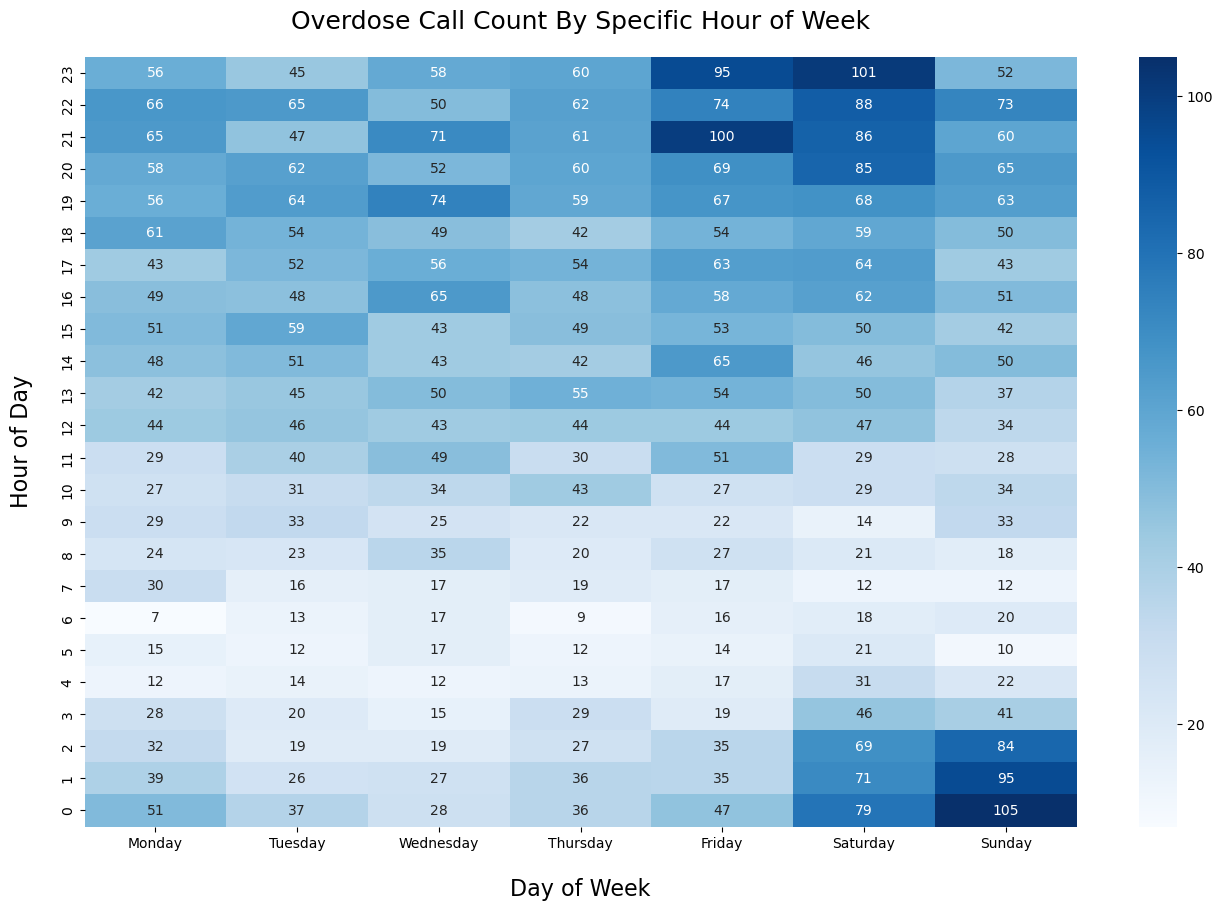

In [338]:

INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap["Day of Week"] = pd.Categorical(INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap\
                                                                          ['Day of Week'], 
                                                                          categories=days, ordered=True)
hm=INTOXICATIONCALLS_BY_HOUR_AND_DOW_heatMap.pivot(index="Hour", columns="Day of Week", values="call_count")
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(hm, annot=True, cmap="Blues", fmt = 'g').invert_yaxis()
plt.title('Overdose Call Count By Specific Hour of Week', fontsize=18, pad=20)
plt.xlabel('Day of Week', fontsize=16, labelpad=20)
plt.ylabel('Hour of Day', fontsize=16, labelpad=20)

* Observations:
    * The darker the cell, the higher the call count during that hour of the week. 
    
    * Fridays, Saturdays and Sundays all have a higher concentration of dark color, found at the bottom (early in the morning) and top (late at night)


## 16: HIGHLIGHT MOST PREVALENT EMS CALL TYPES IN EACH JURISDICTION


#### First we create data frame where the EMSONLY Data Frame is grouped by Township('twp' and Calltype2 and the total EMS call count is shown for each group


In [316]:

emsCallType_df=EMSONLY.groupby(["township", "secondary_callType"]).count()["call_count"].to_frame()


In [341]:
EMSONLY.head()

,lat,lng,desc,zip,title,timeStamp,township,addr,call_count,calltype,year,month,day,hour,date,dayofweek,secondary_callType
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,2016,1,1,0,2016-01-01,Friday,ASSAULT VICTIM
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,2016,1,1,0,2016-01-01,Friday,FALL VICTIM
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,2016,1,1,0,2016-01-01,Friday,ABDOMINAL PAINS
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,nan,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,2016,1,1,0,2016-01-01,Friday,ALTERED MENTAL STATUS
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,2016,1,1,0,2016-01-01,Friday,DIABETIC EMERGENCY


In [318]:
emsCallType_df

call_count
township  secondary_callType                   
ABINGTON  ABDOMINAL PAINS                   471
          ALLERGIC REACTION                 122
          ALTERED MENTAL STATUS             649
          AMPUTATION                          4
          ANIMAL BITE                        42
...                                         ...
WORCESTER UNCONSCIOUS SUBJECT                60
          UNKNOWN MEDICAL EMERGENCY          34
          UNRESPONSIVE SUBJECT               24
          VEHICLE ACCIDENT                  317
          VEHICLE FIRE                        4

[3190 rows x 1 columns]

#### Now we take our data frame and reset the index, and then sort by township ('twp'; ascending = True) and then call count ('e'; ascending= false). Now, for each township, we have the call type with the HIGHEST count on top!

In [319]:
emsCallType_df=emsCallType_df.sort_values(['township', 'call_count'], ascending=[True, False]).reset_index()

In [320]:
#emsCallType_df.rename(columns={'twp':'Township', "calltype2":"Calltype2"}, inplace=True)
emsCallType_df.style.set_caption('emsCallType_df')
emsCallType_df.head(60)


,township,secondary_callType,call_count
0,ABINGTON,FALL VICTIM,1914
1,ABINGTON,RESPIRATORY EMERGENCY,1794
2,ABINGTON,CARDIAC EMERGENCY,1672
3,ABINGTON,VEHICLE ACCIDENT,1150
4,ABINGTON,HEAD INJURY,1143
5,ABINGTON,SUBJECT IN PAIN,1051
6,ABINGTON,GENERAL WEAKNESS,730
7,ABINGTON,SYNCOPAL EPISODE,730
8,ABINGTON,ALTERED MENTAL STATUS,649
9,ABINGTON,SEIZURES,573


* As we can see above, for the Abington Township, the "FALL VICTIM" category appears on top (most prevalent), and for the Ambler Township, the "RESPIRATORY EMERGENCY" category appears on top (most prevalent)

#### We then take our data frame, split it into groups based on the township, and then take the index number that has the highest call count.

#### This gives us a Group-By series (emsCallType_df_groupby_township_max_index) with each township as the group, and then the index from the initial dataframe that has the highest Call Count value in the group. An example of this is the '59' next to "Ambler" in the series below. If we look above to our organized data frame, we'll see that the call type that appears at the top of the "Ambler" township (highest call count) appears at index 59

In [321]:
emsCallType_df_groupby_township_max_index=emsCallType_df.groupby('township')['call_count'].idxmax()
emsCallType_df_groupby_township_max_index

township
ABINGTON              0
AMBLER               59
BERKS COUNTY        103
BRIDGEPORT          147
BRYN ATHYN          197
                   ... 
WEST NORRITON      2938
WEST POTTSGROVE    2990
WHITEMARSH         3036
WHITPAIN           3094
WORCESTER          3146
Name: call_count, Length: 68, dtype: int64



#### Now we create a new data frame;  Max_call2type2_by_twp
#### We plug the GroupBy series into the original dataframe (emsCallType_df) and it gives us a new dataframe with only those referenced indices

In [322]:
Max_calltype2_by_twp=emsCallType_df.loc[emsCallType_df.groupby('township')['call_count'].idxmax()]


In [323]:
Max_calltype2_by_twp

,township,secondary_callType,call_count
0,ABINGTON,FALL VICTIM,1914
59,AMBLER,RESPIRATORY EMERGENCY,264
103,BERKS COUNTY,FALL VICTIM,231
147,BRIDGEPORT,CARDIAC EMERGENCY,161
197,BRYN ATHYN,CARDIAC EMERGENCY,56
...,...,...,...
2938,WEST NORRITON,FALL VICTIM,621
2990,WEST POTTSGROVE,FALL VICTIM,117
3036,WHITEMARSH,VEHICLE ACCIDENT,694
3094,WHITPAIN,FALL VICTIM,647


In [324]:
#This gives us all 5 call categories that fall in the #1 place 
Max_calltype2_by_twp.secondary_callType.unique().tolist()

['FALL VICTIM',
 'RESPIRATORY EMERGENCY',
 'CARDIAC EMERGENCY',
 'VEHICLE ACCIDENT',
 'HEAD INJURY']

#### Now we do a value_count to find out, for each calltype above, how many Jurisdictions can claim it as their most common

In [325]:

Max_calltype2_by_twp['secondary_callType'].unique()

Max_calltype2_by_twp.secondary_callType.value_counts().to_frame().reset_index().rename(columns={'secondary_callType':'call_count', 'index':'secondary_callType'})

,secondary_callType,call_count
0,FALL VICTIM,23
1,RESPIRATORY EMERGENCY,17
2,CARDIAC EMERGENCY,14
3,VEHICLE ACCIDENT,13
4,HEAD INJURY,1


As we can see from the dataframe above, 23 juridictions can claim "FALL VICTIM" as their most prevalent call type, where 17 townships can call "RESPIRATORY EMERGENCY" their most prevalent call type.

#### We can plot the above dataframe into a bar chart.

<AxesSubplot:title={'center':'Corrleation between Secondary Call Type and # Jurisdictions For Which it is the Most Prevalent'}, xlabel="Specific EMS Call type ('secondary_callType')", ylabel='# Jurisdictions'>

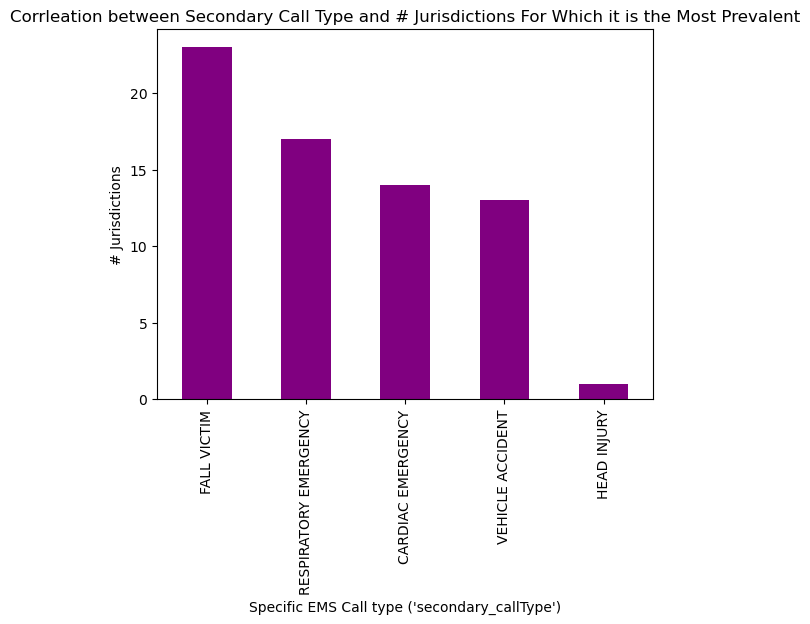

In [326]:
Max_calltype2_by_twp.secondary_callType.value_counts().plot(
    kind="bar", 
    xlabel="Specific EMS Call type ('secondary_callType')", 
    ylabel='# Jurisdictions',
    title='Corrleation between Secondary Call Type and # Jurisdictions For Which it is the Most Prevalent',
    color='purple')
    

#### We can also see WHICH jurisdictions claimed a given calltype as their most prevalent, not just how many. For instance, if we wanted to see in which 17 jurisdictions "CARDIAC EMERGENCY" was the most prevalent secondary call type, we could do so by using the below function and passing "CARDIAC EMERGENCY" as an argument. We can check this for any secondary call type; All we would need to do is pass it as an argument

In [327]:
def findTownshipsWithCallType(calltype2):
    TownshipsArray=Max_calltype2_by_twp[Max_calltype2_by_twp['secondary_callType']==calltype2].sort_values('call_count', ascending=False)
    Townshipslist=TownshipsArray.township.unique().tolist()
    print(f'The following townships have {calltype2} as their most prevalent: \n')
    print(*Townshipslist, sep="\n")


In [328]:
findTownshipsWithCallType('CARDIAC EMERGENCY')


The following townships have CARDIAC EMERGENCY as their most prevalent: 

UPPER MORELAND
HORSHAM
LIMERICK
MONTGOMERY
UPPER GWYNEDD
HATFIELD TOWNSHIP
LOWER GWYNEDD
SKIPPACK
UPPER HANOVER
PENNSBURG
BRIDGEPORT
EAST GREENVILLE
BRYN ATHYN
DELAWARE COUNTY


In [329]:
findTownshipsWithCallType('HEAD INJURY')

The following townships have HEAD INJURY as their most prevalent: 

SCHWENKSVILLE
